In [122]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [105]:
nhs=pd.read_csv('nhsRegion_2022-04-01.csv')
region= pd.read_csv('region_2022-04-01.csv')
ulta=pd.read_csv('utla_2022-04-01.csv')
vac=pd.read_csv('data_2022-Apr-05.csv')

<AxesSubplot:>

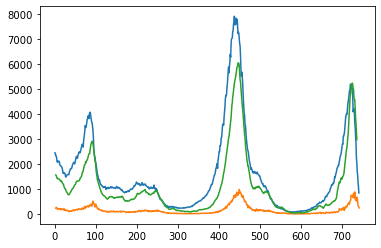

In [4]:
nhs.hospitalCases.plot()
nhs.newAdmissions.plot()
nhs.newAdmissionsRollingSum.plot()

In [5]:
region.describe()

,newCasesByPublishDate,newCasesBySpecimenDate,newCasesBySpecimenDateRollingSum
count,715.000000,788.000000,778.000000
mean,3877.001399,3541.335025,24666.787918
std,7028.395818,5493.730567,37058.711326
min,0.000000,0.000000,1.000000
25%,289.000000,293.750000,2064.000000
50%,2069.000000,1590.500000,11952.000000
75%,4272.000000,4027.000000,27219.250000
max,128076.000000,36919.000000,204554.000000


#  ploting london new case numbers 

In [6]:
region.date=pd.to_datetime(region.date, infer_datetime_format=True)

In [7]:
df= region[['newCasesBySpecimenDate','date']]

In [8]:
df=df.set_index('date')

<AxesSubplot:xlabel='date'>

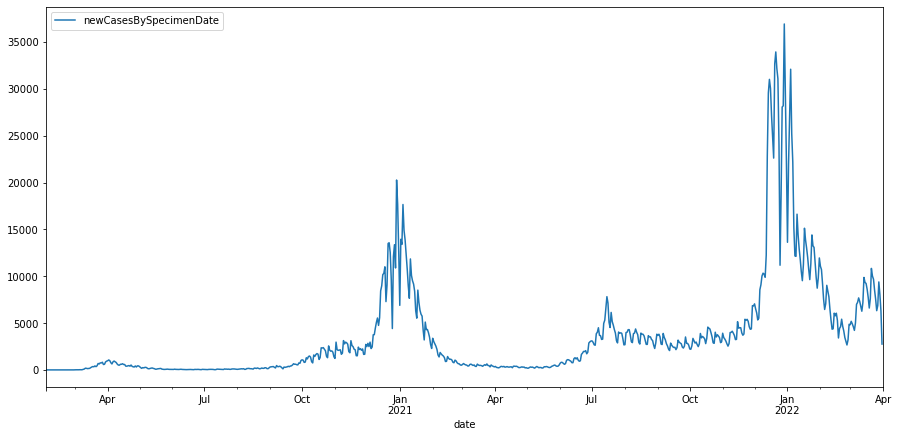

In [9]:
df.plot(figsize= (15,7))

# ploting boroughs new cases 


In [19]:
ulta_sub=ulta[['areaName','date','newCasesBySpecimenDate']]

In [23]:
ulta_sub.date=pd.to_datetime(ulta_sub.date, infer_datetime_format=True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [27]:
ulta_sub.set_index('date')

,areaName,newCasesBySpecimenDate
date,,
2022-03-31,Redcar and Cleveland,57
2022-03-31,York,113
2022-03-31,Cheshire West and Chester,176
2022-03-31,Bolton,88
2022-03-31,Barnsley,120
...,...,...
2020-02-29,Leeds,0
2020-02-29,Essex,0
2020-02-28,East Riding of Yorkshire,1


In [35]:
table = pd.pivot_table(ulta_sub, values='newCasesBySpecimenDate',index='date',
                    columns=['areaName'])

In [66]:
table.head()

areaName,Aberdeen City,Aberdeenshire,Angus,Antrim and Newtownabbey,Ards and North Down,Argyll and Bute,"Armagh City, Banbridge and Craigavon",Barking and Dagenham,Barnet,Barnsley,...,Westminster,Wigan,Wiltshire,Windsor and Maidenhead,Wirral,Wokingham,Wolverhampton,Worcestershire,Wrexham,York
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [99]:
table_total=table[['City of Edinburgh','Glasgow City','Newcastle upon Tyne','Camden','Westminster','York']]

In [93]:
table_sco=table[['City of Edinburgh','Glasgow City']]

In [94]:
table_eng = table[['Newcastle upon Tyne','Camden','Westminster','York']]

In [95]:
table_eng

areaName,Newcastle upon Tyne,Camden,Westminster,York
date,,,,
2020-01-30,NaN,NaN,NaN,1.0
2020-01-31,NaN,NaN,NaN,0.0
2020-02-01,NaN,NaN,NaN,0.0
2020-02-02,NaN,NaN,NaN,0.0
2020-02-03,NaN,NaN,NaN,0.0
...,...,...,...,...
2022-03-27,299.0,189.0,167.0,212.0
2022-03-28,426.0,307.0,251.0,301.0
2022-03-29,336.0,256.0,214.0,250.0


<AxesSubplot:xlabel='date'>

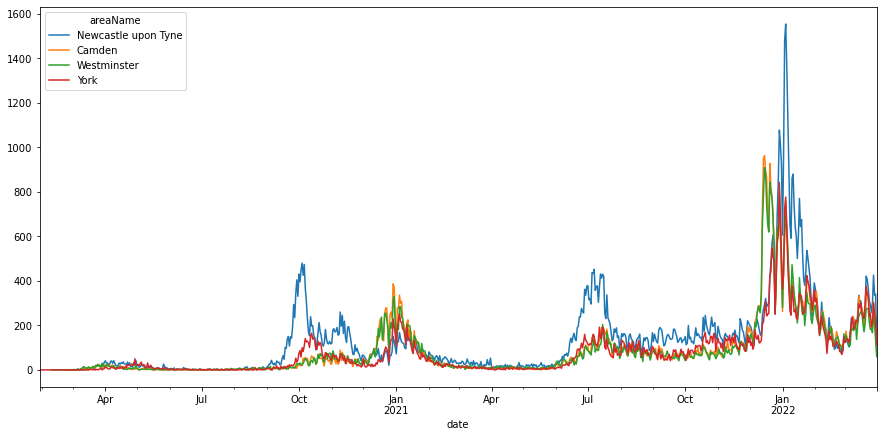

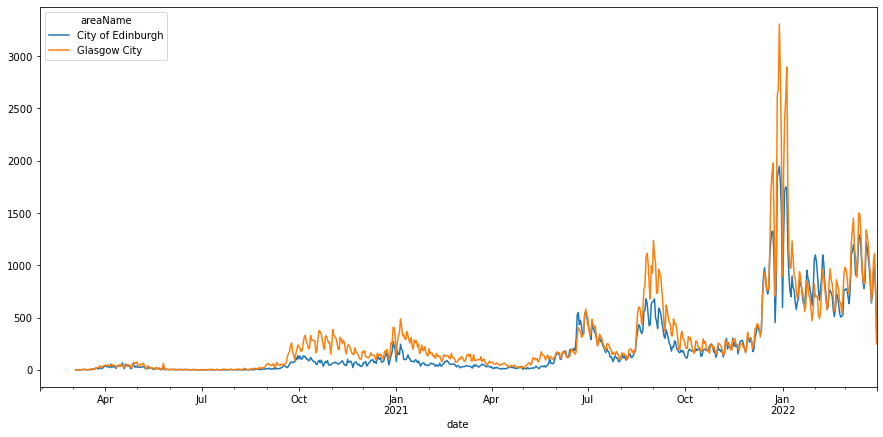

In [98]:
table_eng.plot(figsize=(15,7))
table_sco.plot(figsize=(15,7))

<AxesSubplot:xlabel='date'>

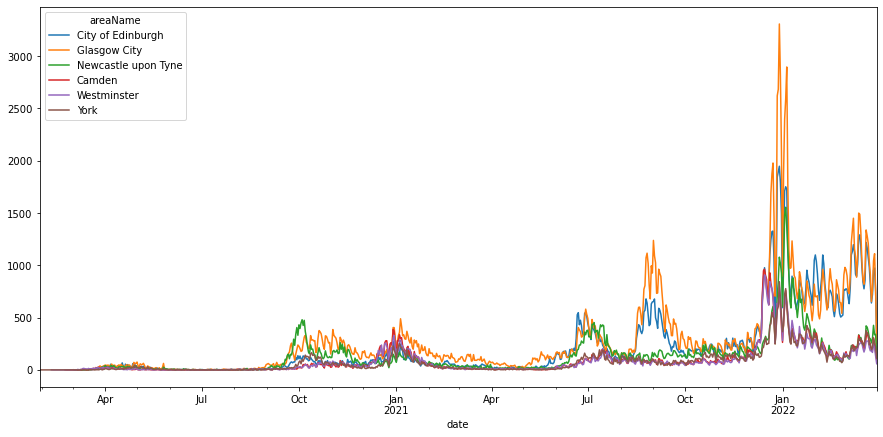

In [100]:
table_total.plot(figsize=(15,7))

,areaCode,areaName,areaType,date,covidOccupiedMVBeds,hospitalCases,newAdmissions,newAdmissionsRollingSum
0,E40000003,London,nhsRegion,2022-04-01,99.0,2448.0,NaN,NaN
1,E40000003,London,nhsRegion,2022-03-31,100.0,2434.0,NaN,NaN
2,E40000003,London,nhsRegion,2022-03-30,104.0,2330.0,231.0,1563.0
3,E40000003,London,nhsRegion,2022-03-29,109.0,2324.0,264.0,1543.0
4,E40000003,London,nhsRegion,2022-03-28,103.0,2266.0,263.0,1492.0
...,...,...,...,...,...,...,...,...
739,E40000003,London,nhsRegion,2020-03-23,NaN,1559.0,505.0,NaN
740,E40000003,London,nhsRegion,2020-03-22,NaN,1266.0,335.0,NaN
741,E40000003,London,nhsRegion,2020-03-21,NaN,1081.0,311.0,NaN
742,E40000003,London,nhsRegion,2020-03-20,NaN,841.0,272.0,NaN


# Vaccination

In [107]:
vac.date=pd.to_datetime(vac.date, infer_datetime_format=True)

<AxesSubplot:xlabel='date'>

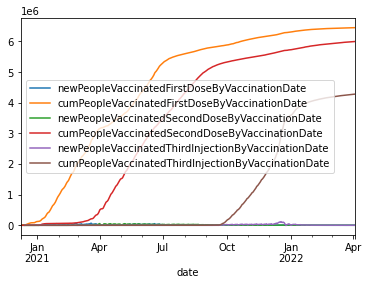

In [110]:
vac.set_index('date').plot()

In [111]:
vac.columns

Index(['areaType', 'areaName', 'areaCode', 'date',
       'newPeopleVaccinatedFirstDoseByVaccinationDate',
       'cumPeopleVaccinatedFirstDoseByVaccinationDate',
       'newPeopleVaccinatedSecondDoseByVaccinationDate',
       'cumPeopleVaccinatedSecondDoseByVaccinationDate',
       'newPeopleVaccinatedThirdInjectionByVaccinationDate',
       'cumPeopleVaccinatedThirdInjectionByVaccinationDate'],
      dtype='object')

In [115]:
vac_sub=vac[['newPeopleVaccinatedFirstDoseByVaccinationDate','newPeopleVaccinatedSecondDoseByVaccinationDate','newPeopleVaccinatedThirdInjectionByVaccinationDate',
            'date']]

<AxesSubplot:xlabel='date'>

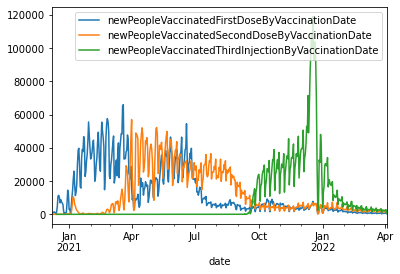

In [117]:
vac_sub.set_index('date').plot()

<AxesSubplot:xlabel='date'>

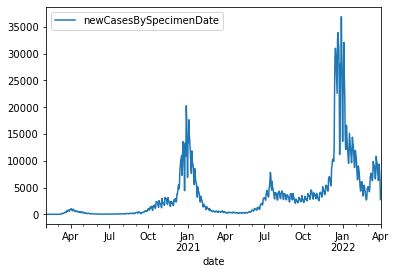

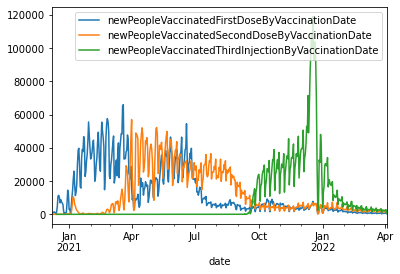

In [120]:
df.plot()
vac_sub.set_index('date').plot()

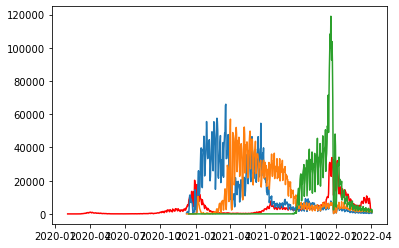

In [128]:
figsize=(15,7)
plt.plot(df, color='r', label='sin')
plt.plot(vac_sub.set_index('date'), label='cos')